# Telecome Churn Prediction
<img src="https://www.element61.be/sites/default/files/img_competences/churn%2520prediction.jpg">
**Customer churn refers to the phenomenon where customers discontinue their relationship or subscription with a
company or service provider.** It represents the rate at which customers stop using a company's products or
services within a specific period. Churn is an important metric for businesses as it directly impacts revenue,
growth, and customer retention. Customer churn refers to the phenomenon where customers discontinue their
relationship or subscription with a company or service provider. It represents the rate at which customers stop
using a company's products or services within a specific period. Churn is an important metric for businesses as it
directly impacts revenue, growth, and customer retention.

In the context of the Churn dataset, the churn label indicates whether a customer has churned or not. A churned
customer is one who has decided to discontinue their subscription or usage of the company's services. On the
other hand, a non-churned customer is one who continues to remain engaged and retains their relationship with
the company.

   

# The Attributess include:
- customerID:customerID 
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport:Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card(automatic))
- MonthlyCharges: The amount charged to the customer monthly [Numeric value between 18.25 and 118.75]
- TotalCharges: The total amount charged to the customer[Numeric value between 18.80 and 8684.8]
- Churn: output class Whether the customer churned or not [No:Not Churn, Yes:Churned]


# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To display maximum rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# import dataframe
df = pd.read_csv("Telco_Customer_Churn.csv")

# Data Overview

In [4]:
# checking the dataframe using head
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Remove unwanted variable from the dataset i.e customerID
df.drop('customerID',axis=1,inplace=True)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Let's check the dimensions of the dataframe
df.shape

(7043, 20)

In [8]:
# Let's see the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Convert datatype of TotalCharges 
#### Data type of  TotalCharges is object and convert into float.


In [9]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [10]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [13]:
df['TotalCharges'].isnull().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
# let's look at the statistical aspects of the dataframe
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Anaysis

## Data Visualization

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

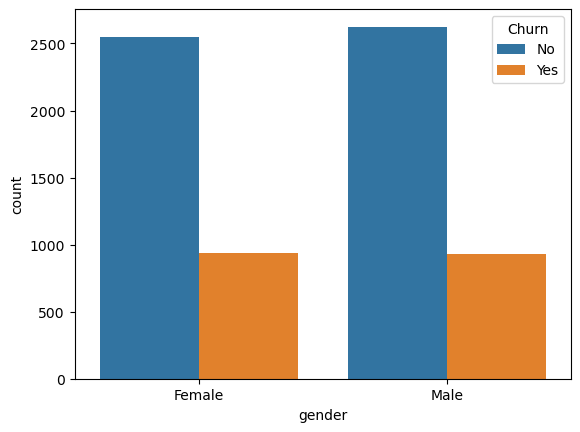

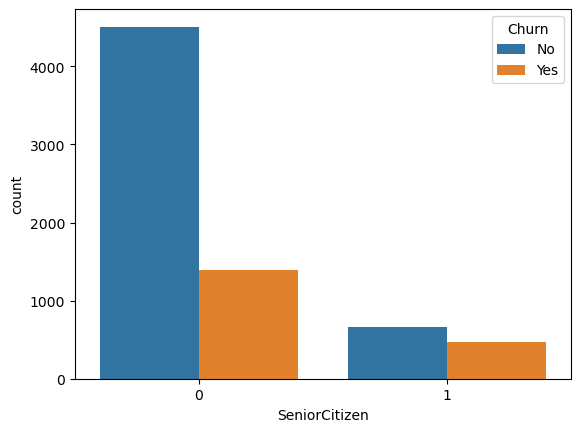

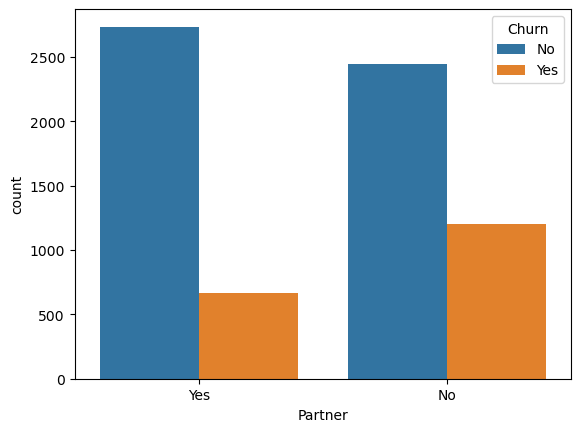

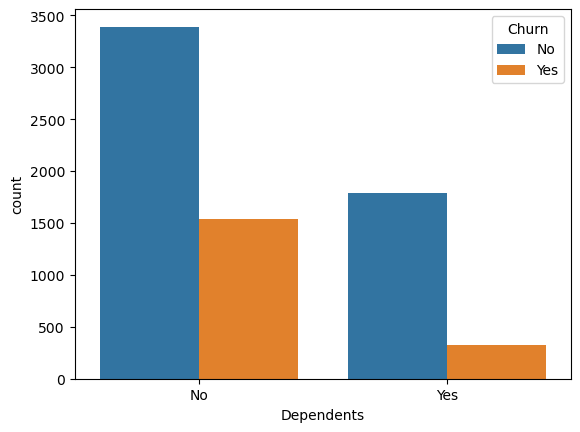

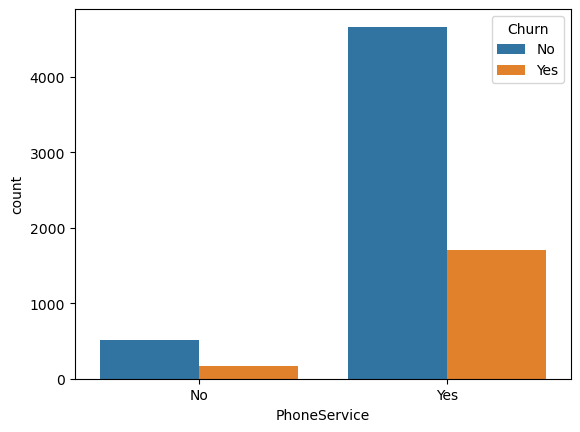

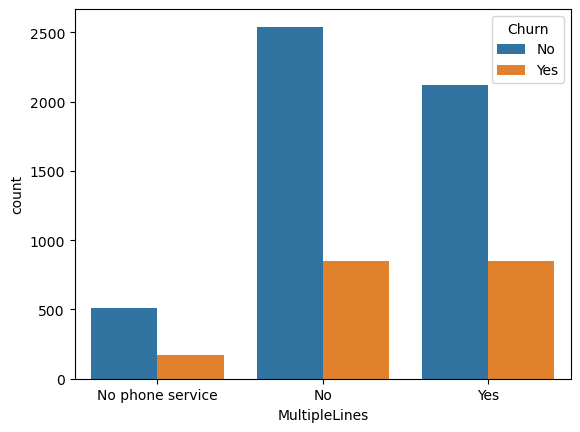

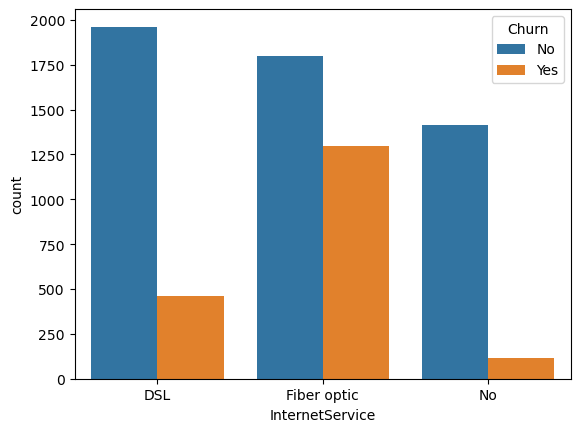

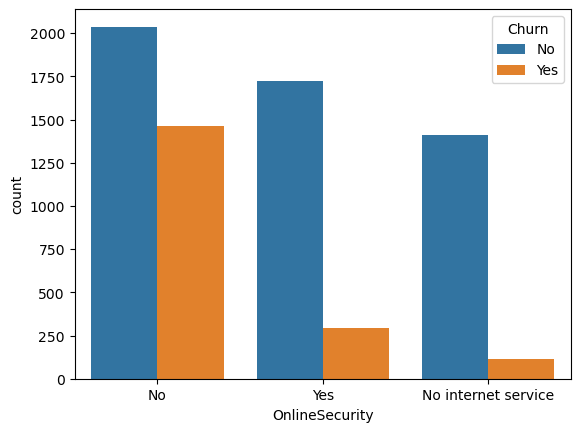

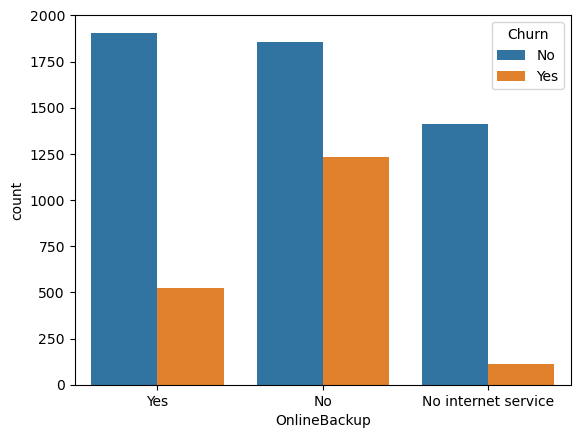

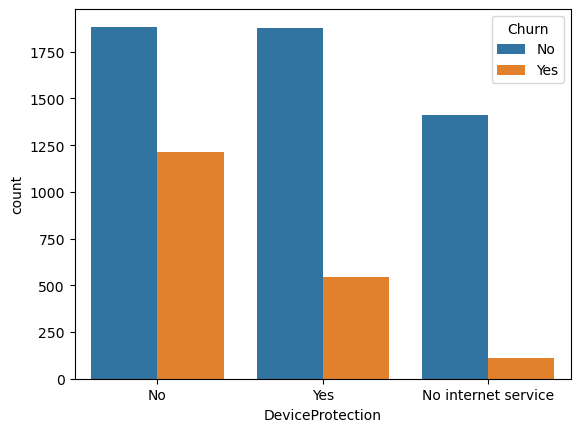

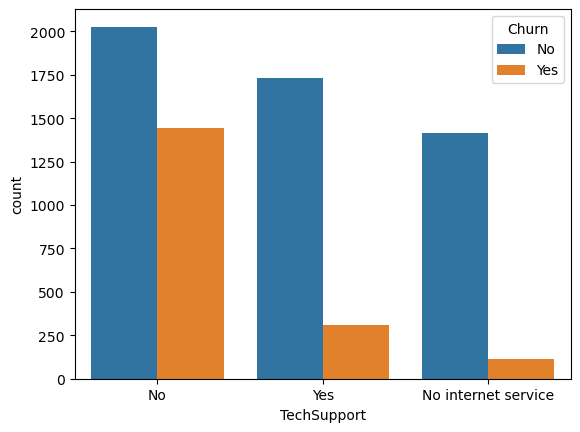

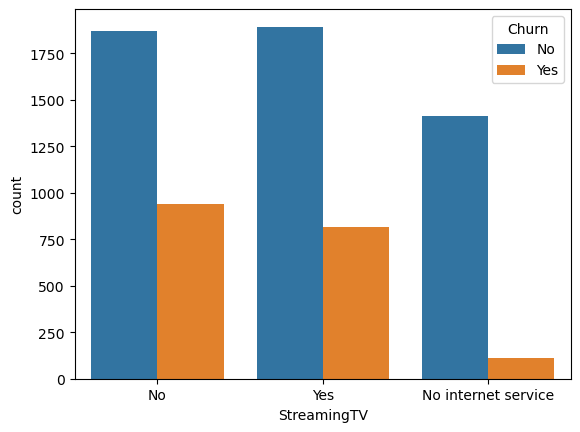

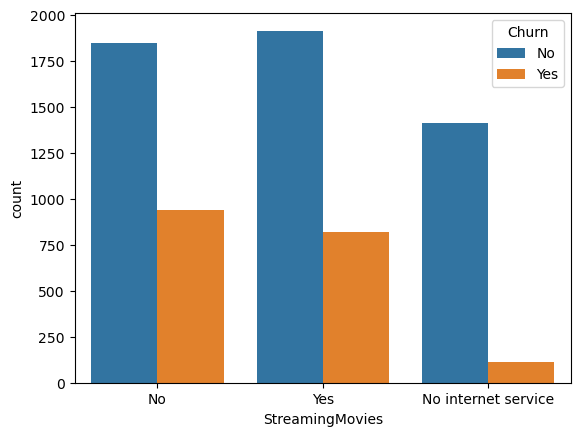

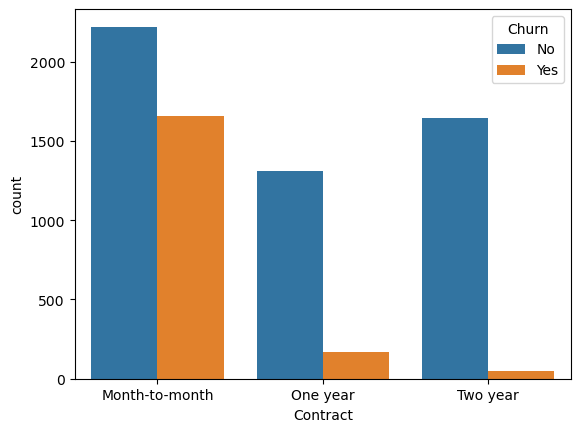

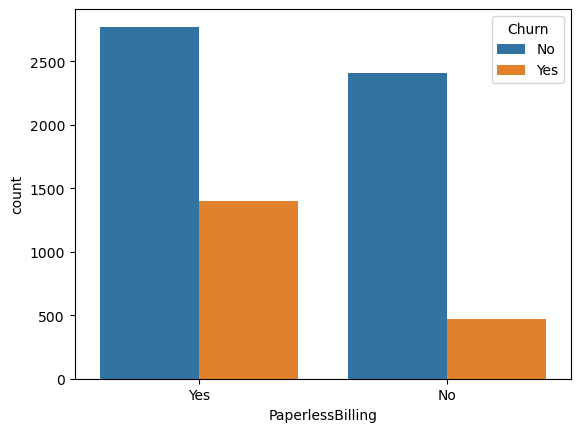

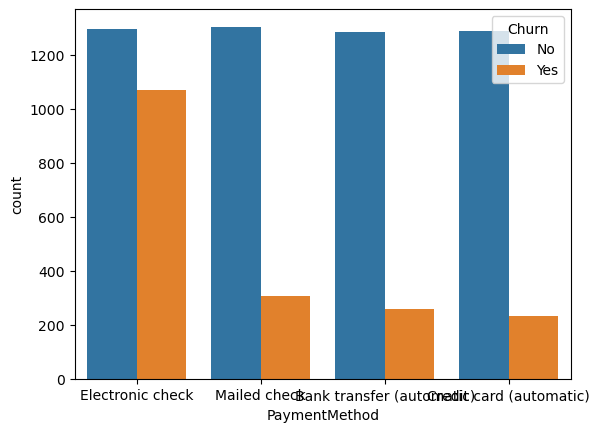

In [17]:
# Shows the Distribution of Churn with respect to categorical variables

categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

for i in categorical:
    sns.countplot(x=df[i],data=df, hue = df['Churn'])
    plt.show()

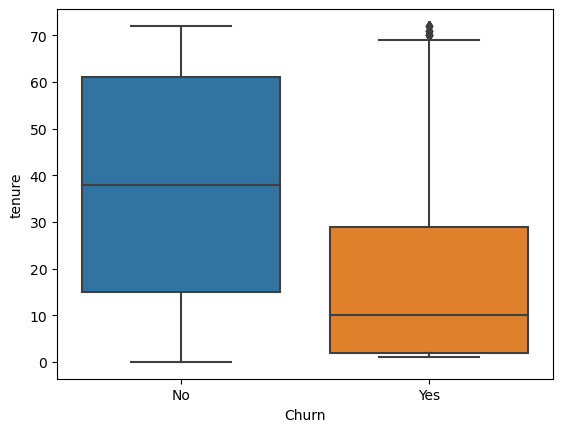

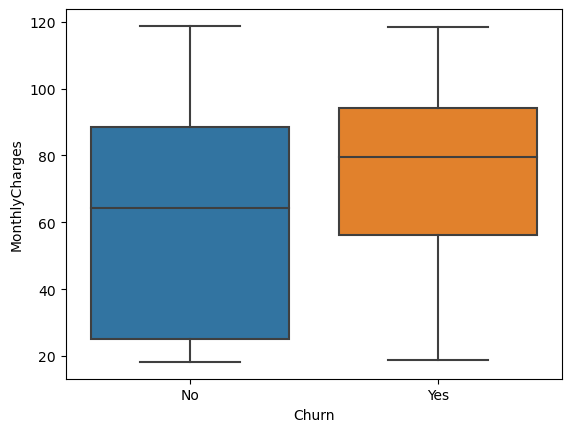

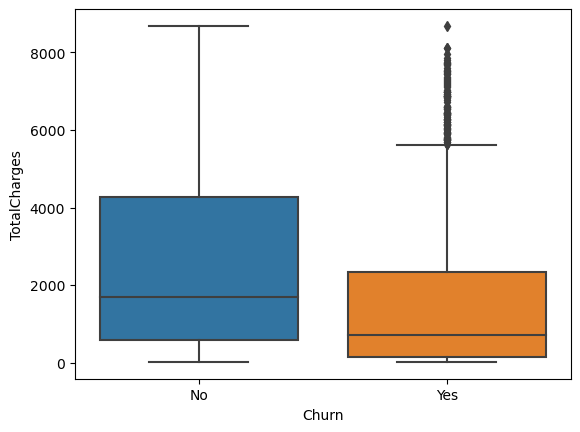

In [18]:
#Shows the Distribution of Churn with respect to continoues variables

continoues = ['tenure','MonthlyCharges','TotalCharges']

for i in continoues:
    sns.boxplot(x=df['Churn'],data=df, y=df[i])
    plt.show()

# Data Processing

## 1.Handling Null Value:

In [19]:
# Checking null value in dataframe  
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
# Checking duplicate values in dataframe.
df.duplicated().sum()

22

In [21]:
# Drop duplicate value from data frame.
df.drop_duplicates(inplace = True)

In [22]:
# Checking duplicate values in dataframe.
df.duplicated().sum()

0

# Feature Engineering

## Handling  Categorical Variable 
### Label Encoding

In [23]:
df.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [24]:
# Label encoding for categorical variable.
variable = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

# Defining the map function
def binary_map(x):
    return x.map({"No": 0,'Yes': 1})

# Applying the function to the churn df list
df[variable] = df[variable].apply(binary_map)

In [25]:
df.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,Female,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,Male,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [26]:
# Label encoding for categorical variable.
variable = ['gender']

# Defining the map function
def binary_map(x):
    return x.map({'Male': 1, "Female": 0})

# Applying the function to the churn df list
df[variable] = df[variable].apply(binary_map)

In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [28]:
# Label encoding for categorical variable.
variable = ['Contract']

# Defining the map function
def number_map(x):
    return x.map({'Two year':2,'One year': 1, "Month-to-month": 0,})

# Applying the function to the churn df list
df[variable] = df[variable].apply(number_map)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,1,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,0,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,0,1,Electronic check,70.70,151.65,1


In [29]:
# Label encoding for categorical variable.
variable = ['PaymentMethod']

# Defining the map function
def number_map(x):
    return x.map({'Electronic check':1,'Mailed check': 2, "Bank transfer (automatic)": 3,'Credit card (automatic)':4})

# Applying the function to the churn df list
df[variable] = df[variable].apply(number_map)
df.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,1,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,0,1,2,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,0,1,1,70.70,151.65,1
5,0,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,0,1,1,99.65,820.50,1
6,1,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,0,1,4,89.10,1949.40,0
7,0,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,0,0,2,29.75,301.90,0
8,0,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,0,1,1,104.80,3046.05,1
9,1,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,1,0,3,56.15,3487.95,0


In [30]:
# Label encoding for categorical variable.
variable = ['InternetService']

# Defining the map function
def number_map(x):
    return x.map({'DSL':2,'Fiber optic': 1, "No": 0,})

# Applying the function to the churn df list
df[variable] = df[variable].apply(number_map)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,2,No,Yes,No,No,No,No,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,No,2,Yes,No,Yes,No,No,No,1,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,No,2,Yes,Yes,No,No,No,No,0,1,2,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,2,Yes,No,Yes,Yes,No,No,1,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,No,1,No,No,No,No,No,No,0,1,1,70.70,151.65,1


### One Hot Coding

In [31]:
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)


In [32]:
# concat the dataframe and Dummified variable.
df = pd.concat([df, ml1], axis=1)


In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes
0,0,0,1,0,1,0,No phone service,2,No,Yes,No,No,No,No,0,1,1,29.85,29.85,0,0,0
1,1,0,0,0,34,1,No,2,Yes,No,Yes,No,No,No,1,0,2,56.95,1889.50,0,1,0
2,1,0,0,0,2,1,No,2,Yes,Yes,No,No,No,No,0,1,2,53.85,108.15,1,1,0
3,1,0,0,0,45,0,No phone service,2,Yes,No,Yes,Yes,No,No,1,0,3,42.30,1840.75,0,0,0
4,0,0,0,0,2,1,No,1,No,No,No,No,No,No,0,1,1,70.70,151.65,1,1,0


In [34]:
# drop MultipleLines variable from Dataframe.
df.drop('MultipleLines',axis=1,inplace=True)

In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes
0,0,0,1,0,1,0,2,No,Yes,No,No,No,No,0,1,1,29.85,29.85,0,0,0
1,1,0,0,0,34,1,2,Yes,No,Yes,No,No,No,1,0,2,56.95,1889.50,0,1,0
2,1,0,0,0,2,1,2,Yes,Yes,No,No,No,No,0,1,2,53.85,108.15,1,1,0
3,1,0,0,0,45,0,2,Yes,No,Yes,Yes,No,No,1,0,3,42.30,1840.75,0,0,0
4,0,0,0,0,2,1,1,No,No,No,No,No,No,0,1,1,70.70,151.65,1,1,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7021 non-null   int64  
 1   SeniorCitizen      7021 non-null   int64  
 2   Partner            7021 non-null   int64  
 3   Dependents         7021 non-null   int64  
 4   tenure             7021 non-null   int64  
 5   PhoneService       7021 non-null   int64  
 6   InternetService    7021 non-null   int64  
 7   OnlineSecurity     7021 non-null   object 
 8   OnlineBackup       7021 non-null   object 
 9   DeviceProtection   7021 non-null   object 
 10  TechSupport        7021 non-null   object 
 11  StreamingTV        7021 non-null   object 
 12  StreamingMovies    7021 non-null   object 
 13  Contract           7021 non-null   int64  
 14  PaperlessBilling   7021 non-null   int64  
 15  PaymentMethod      7021 non-null   int64  
 16  MonthlyCharges     7021 

In [37]:
 ml = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
# Dropping OnlineSecurity_No internet service column
ml1 = ml.drop(['OnlineSecurity_No internet service'], 1)

In [38]:
df = pd.concat([df, ml1], axis=1)

In [39]:
df.drop('OnlineSecurity', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes
0,0,0,1,0,1,0,2,Yes,No,No,No,No,0,1,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,2,No,Yes,No,No,No,1,0,2,56.95,1889.50,0,1,0,0,1
2,1,0,0,0,2,1,2,Yes,No,No,No,No,0,1,2,53.85,108.15,1,1,0,0,1
3,1,0,0,0,45,0,2,No,Yes,Yes,No,No,1,0,3,42.30,1840.75,0,0,0,0,1
4,0,0,0,0,2,1,1,No,No,No,No,No,0,1,1,70.70,151.65,1,1,0,1,0


In [40]:
ml = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
# Dropping OnlineBackup_No internet service column
ml1 = ml.drop(['OnlineBackup_No internet service'], 1)

In [41]:
df = pd.concat([df, ml1], axis=1)

In [42]:
df.drop('OnlineBackup',axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes
0,0,0,1,0,1,0,2,No,No,No,No,0,1,1,29.85,29.85,0,0,0,1,0,0,1
1,1,0,0,0,34,1,2,Yes,No,No,No,1,0,2,56.95,1889.50,0,1,0,0,1,1,0
2,1,0,0,0,2,1,2,No,No,No,No,0,1,2,53.85,108.15,1,1,0,0,1,0,1
3,1,0,0,0,45,0,2,Yes,Yes,No,No,1,0,3,42.30,1840.75,0,0,0,0,1,1,0
4,0,0,0,0,2,1,1,No,No,No,No,0,1,1,70.70,151.65,1,1,0,1,0,1,0


In [43]:
ml = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection')
# Dropping DeviceProtection_No internet service column
ml1 = ml.drop(['DeviceProtection_No internet service'], 1)

In [44]:
df = pd.concat([df,ml1],axis=1)

In [45]:
df.drop('DeviceProtection', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes
0,0,0,1,0,1,0,2,No,No,No,0,1,1,29.85,29.85,0,0,0,1,0,0,1,1,0
1,1,0,0,0,34,1,2,No,No,No,1,0,2,56.95,1889.50,0,1,0,0,1,1,0,0,1
2,1,0,0,0,2,1,2,No,No,No,0,1,2,53.85,108.15,1,1,0,0,1,0,1,1,0
3,1,0,0,0,45,0,2,Yes,No,No,1,0,3,42.30,1840.75,0,0,0,0,1,1,0,0,1
4,0,0,0,0,2,1,1,No,No,No,0,1,1,70.70,151.65,1,1,0,1,0,1,0,1,0


In [46]:
ml = pd.get_dummies(df['TechSupport'], prefix='TechSupport')
# Dropping TechSupport_No internet service column
ml1 = ml.drop(['TechSupport_No internet service'], 1)

In [47]:
df = pd.concat([df,ml1],axis=1)

In [48]:
df.drop('TechSupport',axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes
0,0,0,1,0,1,0,2,No,No,0,1,1,29.85,29.85,0,0,0,1,0,0,1,1,0,1,0
1,1,0,0,0,34,1,2,No,No,1,0,2,56.95,1889.50,0,1,0,0,1,1,0,0,1,1,0
2,1,0,0,0,2,1,2,No,No,0,1,2,53.85,108.15,1,1,0,0,1,0,1,1,0,1,0
3,1,0,0,0,45,0,2,No,No,1,0,3,42.30,1840.75,0,0,0,0,1,1,0,0,1,0,1
4,0,0,0,0,2,1,1,No,No,0,1,1,70.70,151.65,1,1,0,1,0,1,0,1,0,1,0


In [49]:
ml = pd.get_dummies(df['StreamingTV'], prefix='StreamingTV')
# Dropping StreamingTV_No internet service column
ml1 = ml.drop(['StreamingTV_No internet service'], 1)


In [50]:
df = pd.concat([df,ml1],axis=1)

In [51]:
df.drop('StreamingTV',axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes
0,0,0,1,0,1,0,2,No,0,1,1,29.85,29.85,0,0,0,1,0,0,1,1,0,1,0,1,0
1,1,0,0,0,34,1,2,No,1,0,2,56.95,1889.50,0,1,0,0,1,1,0,0,1,1,0,1,0
2,1,0,0,0,2,1,2,No,0,1,2,53.85,108.15,1,1,0,0,1,0,1,1,0,1,0,1,0
3,1,0,0,0,45,0,2,No,1,0,3,42.30,1840.75,0,0,0,0,1,1,0,0,1,0,1,1,0
4,0,0,0,0,2,1,1,No,0,1,1,70.70,151.65,1,1,0,1,0,1,0,1,0,1,0,1,0


In [52]:
ml = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies')
# Dropping StreamingMovies_No_No internet service column
ml1 = ml.drop(['StreamingMovies_No internet service'], 1)

In [53]:
df = pd.concat([df,ml1],axis=1)

In [54]:
df.drop('StreamingMovies', axis=1, inplace=True)

In [55]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,0,1,0,1,0,2,0,1,1,29.85,29.85,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,1,0,0,0,34,1,2,1,0,2,56.95,1889.50,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,1,0,0,0,2,1,2,0,1,2,53.85,108.15,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,1,0,0,0,45,0,2,1,0,3,42.30,1840.75,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,0,0,0,0,2,1,1,0,1,1,70.70,151.65,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [56]:
# Let's see the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                7021 non-null   int64  
 1   SeniorCitizen         7021 non-null   int64  
 2   Partner               7021 non-null   int64  
 3   Dependents            7021 non-null   int64  
 4   tenure                7021 non-null   int64  
 5   PhoneService          7021 non-null   int64  
 6   InternetService       7021 non-null   int64  
 7   Contract              7021 non-null   int64  
 8   PaperlessBilling      7021 non-null   int64  
 9   PaymentMethod         7021 non-null   int64  
 10  MonthlyCharges        7021 non-null   float64
 11  TotalCharges          7021 non-null   float64
 12  Churn                 7021 non-null   int64  
 13  MultipleLines_No      7021 non-null   uint8  
 14  MultipleLines_Yes     7021 non-null   uint8  
 15  OnlineSecurity_No    

#  3.Feature Scaling(Normalization)

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,0,1,0,1,0,2,0,1,1,29.85,29.85,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,1,0,0,0,34,1,2,1,0,2,56.95,1889.50,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,1,0,0,0,2,1,2,0,1,2,53.85,108.15,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,1,0,0,0,45,0,2,1,0,3,42.30,1840.75,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,0,0,0,0,2,1,1,0,1,1,70.70,151.65,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
5,0,0,0,0,8,1,1,0,1,1,99.65,820.50,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1
6,1,0,0,1,22,1,1,0,1,4,89.10,1949.40,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0
7,0,0,0,0,10,0,2,0,0,2,29.75,301.90,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0
8,0,0,1,0,28,1,1,0,1,1,104.80,3046.05,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1
9,1,0,0,1,62,1,2,1,0,3,56.15,3487.95,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0


In [59]:
scaler = MinMaxScaler()

df[['tenure','InternetService','Contract','PaymentMethod','MonthlyCharges','TotalCharges']] = scaler.fit_transform(df[['tenure','InternetService','Contract','PaymentMethod','MonthlyCharges','TotalCharges']])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,0,1,0,0.013889,0,1.0,0.0,1,0.000000,0.115423,0.001275,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,1,0,0,0,0.472222,1,1.0,0.5,0,0.333333,0.385075,0.215867,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,1,0,0,0,0.027778,1,1.0,0.0,1,0.333333,0.354229,0.010310,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,1,0,0,0,0.625000,0,1.0,0.5,0,0.666667,0.239303,0.210241,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,0,0,0,0,0.027778,1,0.5,0.0,1,0.000000,0.521891,0.015330,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0


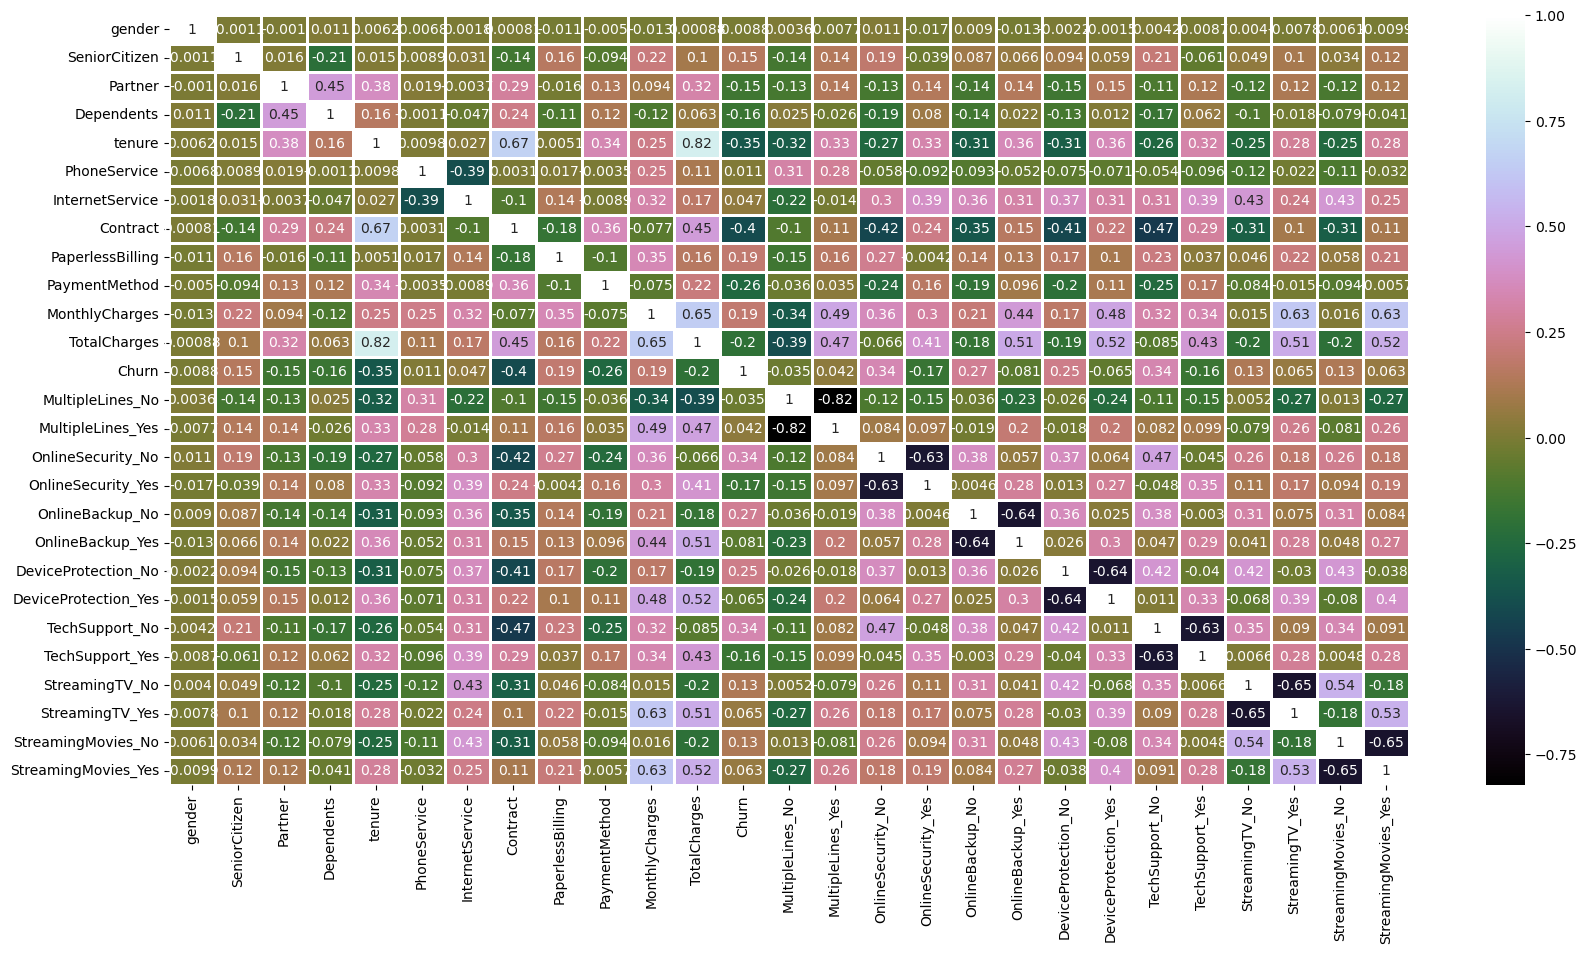

In [60]:
#Let's see the correlation matrix using heatmap.
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True,cmap='cubehelix',linewidth=1)
plt.show()

In [61]:
# Putting feature variable or independent variable to X
X = df.drop(['Churn'], axis=1)

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,0,1,0,0.013889,0,1.0,0.0,1,0.000000,0.115423,0.001275,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,1,0,0,0,0.472222,1,1.0,0.5,0,0.333333,0.385075,0.215867,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,1,0,0,0,0.027778,1,1.0,0.0,1,0.333333,0.354229,0.010310,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,1,0,0,0,0.625000,0,1.0,0.5,0,0.666667,0.239303,0.210241,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,0,0,0,0,0.027778,1,0.5,0.0,1,0.000000,0.521891,0.015330,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [62]:
# Putting response variable to y
y = df['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# Test-Train Split  

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [65]:
# To check the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4914, 26), (2107, 26), (4914,), (2107,))

# Model Building

# Logistic Regression 

Logistic regression is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc. 

Independent variables are analyzed to determine the binary outcome with the results falling into one of two categories. The independent variables can be categorical or numeric, but the dependent variable is always categorical. Written like this:

P(Y=1|X) or P(Y=0|X)

It calculates the probability of dependent variable Y, given independent variable X. 

This can be used to calculate the probability of a word having a positive or negative connotation (0, 1, or on a scale between). Or it can be used to determine the object contained in a photo (tree, flower, grass, etc.), with each object given a probability between 0 and 1.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png">

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr=LogisticRegression()

In [68]:
# Training data is used for model building
lr.fit(X_train,y_train)

LogisticRegression()

In [69]:
# Testing data is used for prediction
y_pred_logreg = lr.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test, y_pred_logreg)


0.7954437588989084

In [72]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [73]:
conf = confusion_matrix(y_test,y_pred_logreg)
conf

array([[1385,  171],
       [ 260,  291]], dtype=int64)

In [74]:
# To see the entire result
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test,y_test)))
# print(classification_report(y_pred_logreg,y_test))

### Visualization of confusion matrix

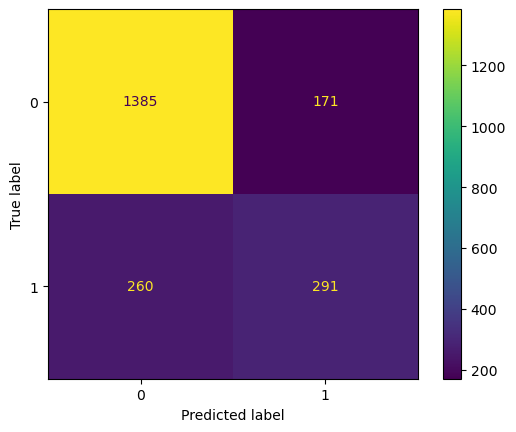

In [75]:
# Confusion matrix of lr testing data
disp = ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=lr.classes_)
disp.plot()

plt.show()

In [76]:
from sklearn.metrics import roc_curve,roc_auc_score

In [77]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_logreg):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_logreg)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_logreg)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
    plot_roc_curve(fpr, tpr)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1385  171]
 [ 260  291]]
Accuracy: [0.79544376]
Sensitivity : [0.84194529]
Specificity : [0.62987013]
Precision: [0.89010283]
Recall: [0.84194529]
F-score: [0.86535458]
AUC: 0.7091167496349241
ROC curve:


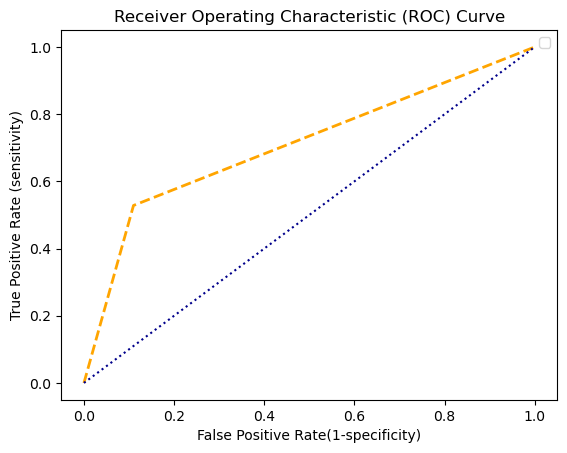

In [78]:
get_summary(y_test,y_pred_logreg)

# Naive bayes Classification

<img src="https://hands-on.cloud/wp-content/uploads/2022/01/Implementing-Naive-Bayes-Classification-using-Python.png">

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
gnb = GaussianNB()

In [81]:
# Training data is used for model building.
gnb.fit(X_train,y_train)

GaussianNB()

In [82]:
# Testing data is used for prediction.
y_pred_gnb = gnb.predict(X_test)

In [83]:
accuracy_score(y_test,y_pred_gnb)
  

0.7361177028951116

In [84]:
gnb_confu_matrix = confusion_matrix(y_test,y_pred_gnb)
gnb_confu_matrix

array([[1152,  404],
       [ 152,  399]], dtype=int64)

### Visualization of confusion matrix

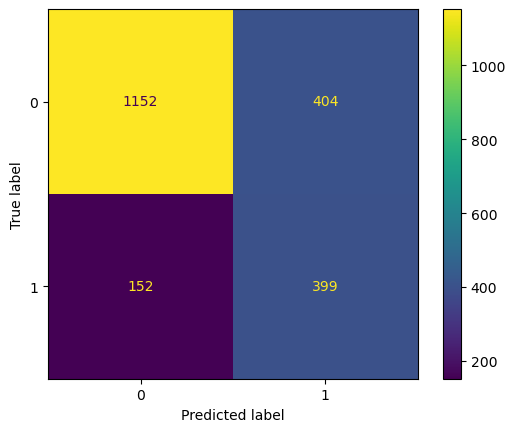

In [85]:
# Confusion matrix of gnb testing data
disp = ConfusionMatrixDisplay(confusion_matrix=gnb_confu_matrix,display_labels=gnb.classes_)
disp.plot()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1152  404]
 [ 152  399]]
Accuracy: [0.7361177]
Sensitivity : [0.88343558]
Specificity : [0.49688667]
Precision: [0.7403599]
Recall: [0.88343558]
F-score: [0.80559441]
AUC: 0.7322489141033596
ROC curve:


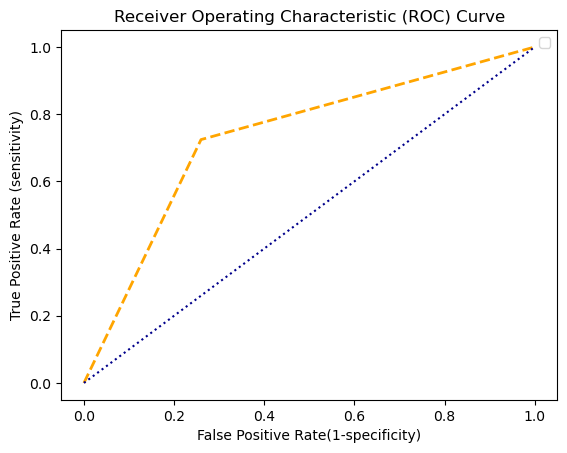

In [86]:
get_summary(y_test,y_pred_gnb)

# K - Nearest Neighbour

The optimal K value usually found is the square root of N, where N is the total number of samples


K-nearest neighbors (k-NN) is a pattern recognition algorithm that uses training datasets to find the k closest relatives in future examples. 

When k-NN is used in classification, you calculate to place data within the category of its nearest neighbor. If k = 1, then it would be placed in the class nearest 1. K is classified by a plurality poll of its neighbors.

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png">

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn = KNeighborsClassifier()

In [89]:
# Training data is used for model building.
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [90]:
# Testing data is used for prediction.
y_pred_knn = knn.predict(X_test)

In [91]:
accuracy_score(y_test,y_pred_knn)


0.751779781680114

In [92]:
knn_con = confusion_matrix(y_test,y_pred_knn)
knn_con

array([[1326,  230],
       [ 293,  258]], dtype=int64)

### Visualization of confusion matrix

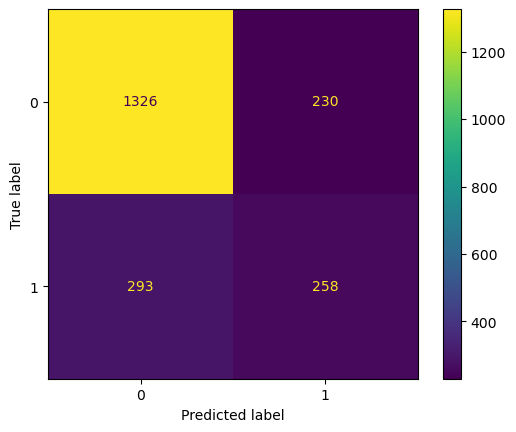

In [93]:
# Confusion matrix of KNN testing data
disp = ConfusionMatrixDisplay(confusion_matrix=knn_con,display_labels=knn.classes_)
disp.plot()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1326  230]
 [ 293  258]]
Accuracy: [0.75177978]
Sensitivity : [0.81902409]
Specificity : [0.52868852]
Precision: [0.85218509]
Recall: [0.81902409]
F-score: [0.83527559]
AUC: 0.6602123272013026
ROC curve:


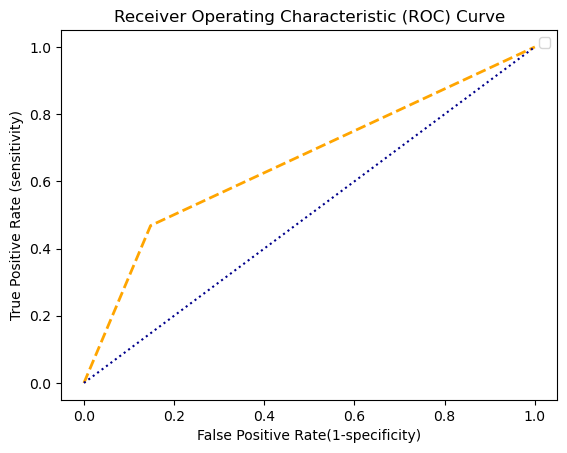

In [94]:
get_summary(y_test,y_pred_knn)

# Decision Tree

<img src="https://cdn.educba.com/academy/wp-content/uploads/2019/11/Create-Decision-Tree-1.png">

A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar. This creates categories within categories, allowing for organic classification with limited human supervision.

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dt = DecisionTreeClassifier()

In [97]:
# Training data is used for model building.
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [98]:
# Testing data is used for prediction.
y_pred_dt = dt.predict(X_test)

In [99]:
accuracy_score(y_test,y_pred_dt)


0.7142857142857143

In [100]:
dtree_con = confusion_matrix(y_test,y_pred_dt)
dtree_con

array([[1247,  309],
       [ 293,  258]], dtype=int64)

### Visualization of confusion matrix

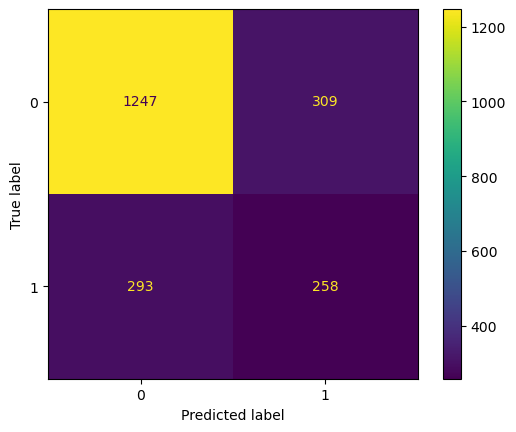

In [101]:
# Confusion matrix of dt testing data
disp = ConfusionMatrixDisplay(confusion_matrix=dtree_con,display_labels=dt.classes_)
disp.plot()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1247  309]
 [ 293  258]]
Accuracy: [0.71428571]
Sensitivity : [0.80974026]
Specificity : [0.45502646]
Precision: [0.80141388]
Recall: [0.80974026]
F-score: [0.80555556]
AUC: 0.6348267230881921
ROC curve:


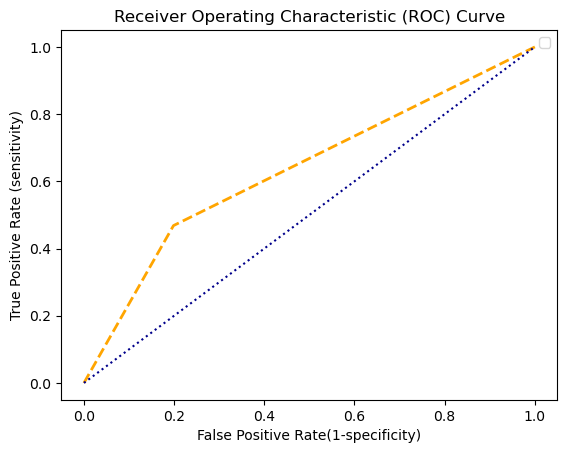

In [102]:
get_summary(y_test,y_pred_dt)

# Random Forest

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).

<img src="https://miro.medium.com/max/5752/1*5dq_1hnqkboZTcKFfwbO9A.png" width=70%>

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds.

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rf = RandomForestClassifier()

In [105]:
# Training data is used for model building.
rf.fit(X_train,y_train)

RandomForestClassifier()

In [106]:
# Testing data is used for prediction.
y_pd_rf = rf.predict(X_test)

In [107]:
accuracy_score(y_test,y_pd_rf)


0.7897484575225439

In [108]:
rf_con_mat = confusion_matrix(y_test,y_pd_rf)
rf_con_mat

array([[1400,  156],
       [ 287,  264]], dtype=int64)

### Visualization of confusion matrix

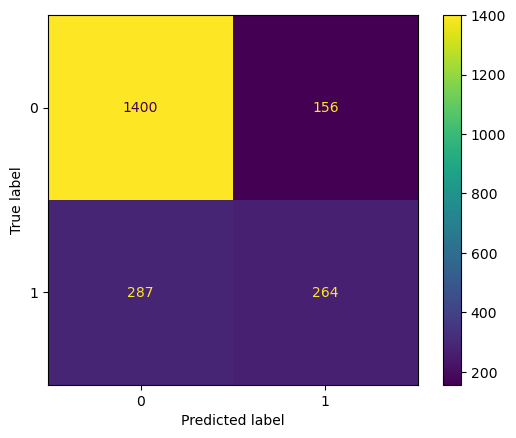

In [109]:
# Confusion matrix of rf testing data.
disp = ConfusionMatrixDisplay(confusion_matrix=rf_con_mat,display_labels=rf.classes_)
disp.plot()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1400  156]
 [ 287  264]]
Accuracy: [0.78974846]
Sensitivity : [0.82987552]
Specificity : [0.62857143]
Precision: [0.89974293]
Recall: [0.82987552]
F-score: [0.86339809]
AUC: 0.6894358936077896
ROC curve:


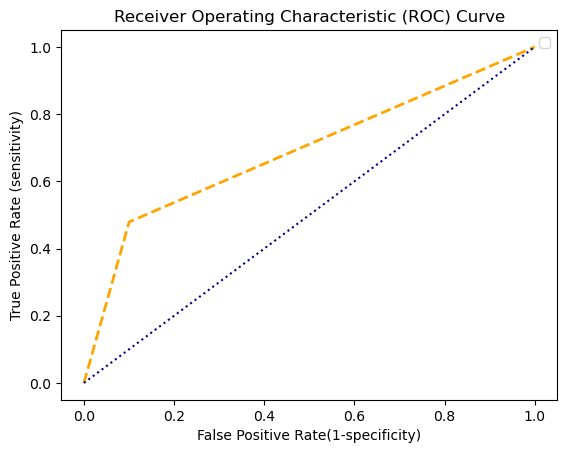

In [110]:
get_summary(y_test,y_pd_rf)

# Support Vector Machine (SVM)

A support vector machine (SVM) uses algorithms to train and classify data within degrees of polarity, taking it to a degree beyond X/Y prediction. 

For a simple visual explanation, we’ll use two tags: red and blue, with two data features: X and Y, then train our classifier to output an X/Y coordinate as either red or blue.

<img src="https://monkeylearn.com/static/93a102a9b7b96d9047212e15b627724b/d8712/image4-3.webp" width=40%>

The SVM then assigns a hyperplane that best separates the tags. In two dimensions this is simply a line. Anything on one side of the line is red and anything on the other side is blue. In sentiment analysis, for example, this would be positive and negative.

In order to maximize machine learning, the best hyperplane is the one with the largest distance between each tag:

<img src="https://monkeylearn.com/static/e662f65502ffd24d3ee23c07efe88d9e/d8712/image3-2.webp" width=40%>

However, as data sets become more complex, it may not be possible to draw a single line to classify the data into two camps:

<img src="https://monkeylearn.com/static/5db2d9178789315ce9fa42f579c895a6/93a24/image2-3.webp" width=40%>

Using SVM, the more complex the data, the more accurate the predictor will become. Imagine the above in three dimensions, with a Z-axis added, so it becomes a circle.

Mapped back to two dimensions with the best hyperplane, it looks like this

<img src="https://monkeylearn.com/static/583405ebadf21c9691030ec4bb875e48/93a24/image6-2.webp" width=40%>

SVM allows for more accurate machine learning because it’s multidimensional.

We need to choose the best Kernel according to our need.
- The linear kernel is mostly preferred for text classification problems as it performs well for large datasets.
- Gaussian kernels tend to give good results when there is no additional information regarding data that is not available.
- Rbf kernel is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.
- Polynomial kernels give good results for problems where all the training data is normalized.

In [111]:
from sklearn.svm import SVC

In [112]:
svc = SVC()

In [113]:
# Training data is used for model building.
svc.fit(X_train,y_train)

SVC()

In [114]:
# Testing data is used for prediction.
y_pred_svc = svc.predict(X_test)

In [115]:
accuracy_score(y_test,y_pred_svc)
   

0.7906976744186046

In [116]:
con_ma_svc = confusion_matrix(y_test,y_pred_svc)
con_ma_svc

array([[1416,  140],
       [ 301,  250]], dtype=int64)

### Visualization of confusion matrix

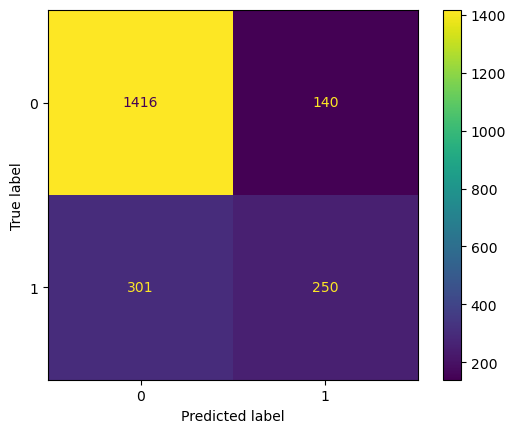

In [117]:
# Confusion matrix of SVM testing data
disp = ConfusionMatrixDisplay(confusion_matrix=con_ma_svc,display_labels=svc.classes_)
disp.plot()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1416  140]
 [ 301  250]]
Accuracy: [0.79069767]
Sensitivity : [0.82469423]
Specificity : [0.64102564]
Precision: [0.91002571]
Recall: [0.82469423]
F-score: [0.86526123]
AUC: 0.6818731075539215
ROC curve:


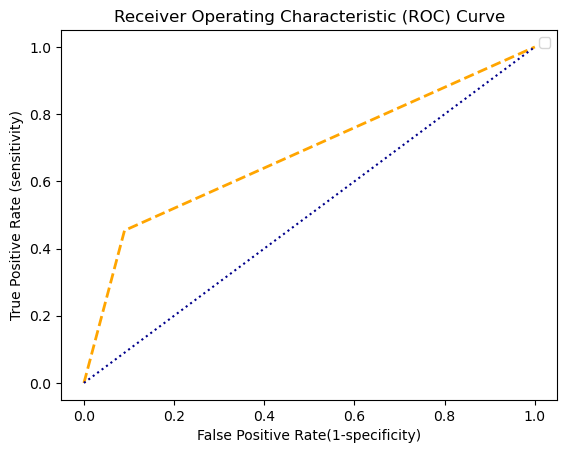

In [118]:
get_summary(y_test,y_pred_svc)

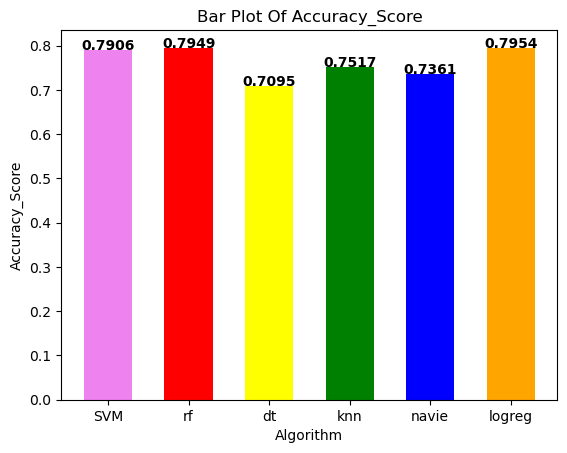

In [119]:
# Shows the Distribution of Churn with respect to categorical variables.
accuracy_data = {'SVM' : 0.7906, 'rf': 0.7949, 'dt': 0.7095, 'knn': 0.7517, 'navie': 0.7361,'logreg': 0.7954}

def addlabels(algo_name,algo_values):
    for i in range(len(algo_name)):
#         print(i)
#         print(algo_values[i])
        plt.text(i,algo_values[i],algo_values[i],fontweight = 'bold', ha='center')
        
        
algo_name = list(accuracy_data.keys())
algo_values = list(accuracy_data.values())
plt.bar(algo_name,algo_values,width=0.6,color=['violet','red','yellow','green','blue','orange'])
addlabels(algo_name, algo_values)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy_Score')
plt.title("Bar Plot Of Accuracy_Score")
plt.savefig("BarPlot Of Accuracy_Score.png")
plt.show()

# Conslusion
#### In Classification all the above model we are getting highest accuracy in Logistic Regresion i.e 79.54%
<img src="https://cdn-images-1.medium.com/v2/resize:fill:1600:480/gravity:fp:0.5:0.4/1*WqId29D5dN_8DhiYQcHa2w.png">

# Thank You!!!